In [2119]:
# Local analysis: for a given image, what prototypes activate most highly?
# Global analysis: for each prototype, what images and patches activate most highly?

import numpy as np
import os

def array_to_str(arr):
    # print(f"arr.shape: {arr.shape}")
    res_str = ""
    for i in range(arr.shape[1]):
        if arr[0, i] == 1:
            res_str = res_str + 'A'
        elif arr[1, i] == 1:
            res_str = res_str + 'T'
        elif arr[2, i] == 1:
            res_str = res_str + 'C'
        elif arr[3, i] == 1:
            res_str = res_str + 'G'
        else:
            # Ambiguity code
            # It is turned into 0s and 1s this way to avoid small number errors
            present = [0,0,0,0]
            for j in range(4):
                if arr[j, i] > 0:
                    present[j] = 1
            if present == [1,1,1,1] or present == [0,0,0,0]:
                res_str = res_str + 'N'
            elif present == [0,1,1,1]:
                res_str = res_str + 'D'
            elif present == [1,0,1,1]:
                res_str = res_str + 'B'
            elif present == [1,1,0,1]:
                res_str = res_str + 'V'
            elif present == [1,1,1,0]:
                res_str = res_str + 'H'
            elif present == [0,0,1,1]:
                res_str = res_str + 'R'
            elif present == [0,1,0,1]:
                res_str = res_str + 'K'
            elif present == [0,1,1,0]:
                res_str = res_str + 'Y'
            elif present == [1,0,0,1]:
                res_str = res_str + 'M'
            elif present == [1,0,1,0]:
                res_str = res_str + 'W'
            elif present == [1,1,0,0]:
                res_str = res_str + 'S'
            else:
                print(present)
                assert False, "Logic error"
    return res_str

In [2120]:
def print_high_act_and_proto(analysis_path, num_to_print=1, weight_by_letter=None):
    # analysis_path: local_results/test_local_seq_25/small_best_updated/
    #   1857326_0.9894.pth/1857326_0.9894.pth/
    for i in range(num_to_print):
        high_act_region = np.load(os.path.join(analysis_path, 'top-{}_activated_test_patch.npy'.format(i+1)))
        proto_region = np.load(os.path.join(analysis_path, 'top-{}_activated_prototype_patch.npy'.format(i+1)))
        # print(f"high_act_region: {high_act_region}")
        # print(f"proto_region: {proto_region}")
        print("Top {} activated region: \t\t".format(i+1) + array_to_str(high_act_region))
        print("Top {} activated prototype: \t\t".format(i+1) + array_to_str(proto_region))

In [2121]:
def print_high_act_and_proto_global(analysis_path, train_or_test, num_to_print=1, prot_ind=1):
    # analysis_path: ./global_results/small_best_updated/1857326_0.9894.pth
    #   /1857326_0.9894.pth/
    for i in range(1, num_to_print+1):
        high_act_region = np.load(os.path.join(
            analysis_path,
            f'most_activated_{train_or_test}_patches_for_prot_'+str(prot_ind),
            f'top-{i}_activated_test_patch.npy'))
        proto_region = np.load(os.path.join(
            analysis_path,
            # 'original_prototype.npy'))
            'prototype_patch.npy'))
        # proto_region = np.load(os.path.join(analysis_path, 'top-{}_activated_prototype_patch.npy'.format(i+1)))
        print(f"Top {i} activated region: \t\t {array_to_str(high_act_region)}")
        print(f"Prototype patch: \t\t\t {array_to_str(proto_region)}")
        # print("Top {} activated prototype: \t\t".format(i+1) + array_to_str(proto_region))

In [2122]:
'''
saved_ppn_models/<arr_job_id>_<combination_number>_<epoch>.pth  *if epoch is -1, it is the last epoch*

saved_prototypes/
    model_name/     ex. <arr_job_id>_<combination_number>_<epoch>
        epoch-125/ ... {35, 80, 125, 170, 215, 259}
            prototype_1_original.npy
            prototype_1_patch.npy
            prototype_1_activations.npy

global_results/
    small_best_updated/
        1857326_0.9894.pth/
            1857326_0.9894.pth/
                most_activated_{train_or_test}_patches_for_prot_0/ ... {25, 50, 75, 100, 125, 150, 175}
                    top-1_activated_test_patch.npy
                    top-1_original_test_seq_tensor(0).npy
                    top-1_prototype_activation_map_112.npy ... 1-9
                original_prototype.npy
                prototype_patch.npy
                log files
local_results/
    epoch-125/ ... {35, 80, 125, 170, 215, 259}
        prototype_1_original.npy
        prototype_1_patch.npy
        prototype_1_activations.npy
    test_local_seq_25/ ...{25, 50, 75, 100, 125, 150, 175}
        small_best_updated/
            1857326_0.9894.pth/
                1857326_0.9894.pth/
                    most_activated_prototypes/
                        top-0_activated_prototype_patch.npy
                        for other files, numbers vary
                    top-1_class_prototypes/ ... {1, 2, 3 (defined in local_analysis.py)}
                        top-1_activated_prototype.npy
                        top-1_activated_test_patch.npy
                        top-1_activated_prototype_patch.npy
                        top-1_prototype_activation_map.npy

global_results/
    small_best_updated/
        1857326_0.9894.pth/
            1857326_0.9894.pth/
                most_activated_{train_or_test}_patches_for_prot_0/ ... {25, 50, 75, 100, 125, 150, 175}
                    top-1_activated_test_patch.npy
                    top-1_original_test_seq_tensor(0).npy
                    top-1_prototype_activation_map_112.npy ... 1-9
                original_prototype.npy
                prototype_patch.npy
                log files
local_results/
    epoch-125/ ... {35, 80, 125, 170, 215, 259}
        prototype_1_original.npy
        prototype_1_patch.npy
        prototype_1_activations.npy
    test_local_seq_25/ ...{25, 50, 75, 100, 125, 150, 175}
        small_best_updated/
            1857326_0.9894.pth/
                1857326_0.9894.pth/
                    most_activated_prototypes/
                        top-0_activated_prototype_patch.npy
                        for other files, numbers vary
                    top-1_class_prototypes/ ... {1, 2, 3 (defined in local_analysis.py)}
                        top-1_activated_prototype.npy
                        top-1_activated_test_patch.npy
                        top-1_activated_prototype_patch.npy
                        top-1_prototype_activation_map.npy
'''

'\nsaved_ppn_models/<arr_job_id>_<combination_number>_<epoch>.pth  *if epoch is -1, it is the last epoch*\n\nsaved_prototypes/\n    model_name/     ex. <arr_job_id>_<combination_number>_<epoch>\n        epoch-125/ ... {35, 80, 125, 170, 215, 259}\n            prototype_1_original.npy\n            prototype_1_patch.npy\n            prototype_1_activations.npy\n\nglobal_results/\n    small_best_updated/\n        1857326_0.9894.pth/\n            1857326_0.9894.pth/\n                most_activated_{train_or_test}_patches_for_prot_0/ ... {25, 50, 75, 100, 125, 150, 175}\n                    top-1_activated_test_patch.npy\n                    top-1_original_test_seq_tensor(0).npy\n                    top-1_prototype_activation_map_112.npy ... 1-9\n                original_prototype.npy\n                prototype_patch.npy\n                log files\nlocal_results/\n    epoch-125/ ... {35, 80, 125, 170, 215, 259}\n        prototype_1_original.npy\n        prototype_1_patch.npy\n        protot

In [2123]:
# print_high_act_and_proto_global('./global_results/small_best_updated/1878231_3_-1.pth/1878231_3_-1.pth/',
#                                 num_to_print=9, prot_ind=25)
# print_high_act_and_proto_global('./global_results/base_feature/input_concat_test/200_16push0.7519.pth/', 'test', num_to_print=10, prot_ind=100) # CHANGE TRAIN OR TEST HERE

In [2124]:
print(f"The current working directory is: {os.getcwd()}")
print_high_act_and_proto('./local_results/test_local_seq_25/small_best_updated/1892566_8_-1_latent_0.7/1892566_8_-1.pth/most_activated_prototypes/', num_to_print=3) # top-1_class_prototypes
# print_high_act_and_proto('./test_local_seq_150/base_feature/input_concat_test_0.8/350_19push0.8534.pth/', num_to_print=10)

The current working directory is: c:\Users\Sam\OneDrive\Desktop\eDNA\protopnet
Top 1 activated region: 		AATAATAAAC
Top 1 activated prototype: 		CATAATAAAC
Top 2 activated region: 		GGACAAGTCG
Top 2 activated prototype: 		AGACAAGTCG
Top 3 activated region: 		ACCATCAACA
Top 3 activated prototype: 		ACCATCAAAA


In [2125]:
print_high_act_and_proto("./local_results/test_local_seq_25/small_best_updated/1892566_8_-1_latent_0.7/1892566_8_-1.pth/top-3_class_prototypes/", num_to_print=3)

Top 1 activated region: 		NNCCTCAAAC
Top 1 activated prototype: 		TTAAACAACT
Top 2 activated region: 		AAACAATTCA
Top 2 activated prototype: 		TCAGCTACTT
Top 3 activated region: 		AAACCATCAA
Top 3 activated prototype: 		CTTCAGCTAC


In [2126]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib
import torch
import torch.nn.functional as F

bluetored = plt.cm.colors.ListedColormap(['blue', 'red'])

# light_blue = (0.8, 0.8, 1.0)  # RGB tuple for light blue
light_blue = (120/255, 202/255, 255/255)  # RGB tuple for light blue
gray = (222/255, 222/255, 222/255)
grayblue = (215/255, 236/255, 234/255)
stronggrayblue = (185/225, 228/225, 224/225)
lightgrayblue = (165/255, 255/255, 246/255)
medgrayblue = (141/255, 213/255, 206/255)
darkgrayblue = (110/255, 168/255, 163/255)
lightlightred = (1, 206/255, 206/255)
lightlightred2 = (243/255, 165/255, 165/255)
lightred = (239/255, 131/255, 131/255)
# lightred = (1.0, 0.5, 0.5)  # Middle color (light red)
lightdarkred = (233/255, 115/255, 115/255)
meddarkred = (211/255, 80/255, 80/255)
dark_red = (0.5, 0.0, 0.0)     # RGB tuple for dark red

# Create a custom colormap using LinearSegmentedColormap
custom_colors = [darkgrayblue, medgrayblue, lightgrayblue, lightlightred, lightlightred2, lightred, lightdarkred, meddarkred, dark_red]
lbluetodred = mcolors.LinearSegmentedColormap.from_list("CustomColormap", custom_colors)
lbluetodred = plt.cm.colors.ListedColormap(custom_colors)

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
# matplotlib.rc('font', **font)

# #print_high_act_and_proto('./test_local_seq_150/base_feature/input_concat_test_0.8/300_15push0.8459.pth/top-1_class_prototypes', num_to_print=1)
# # act_map = np.load('./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/prototype_1_activations.npy')
# act_map = np.load('./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/prototype_1_activations.npy')
# act_map = np.repeat(act_map, repeats=2)
# for i in range(act_map.shape[-1] // 2 - 1):
#     act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

# input_seq = np.load('./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/prototype_1_original.npy')
# print(input_seq.shape)
# input_seq = array_to_str(input_seq)

# colors = plt.get_cmap('coolwarm')(act_map)
# chars_per_line = 20
# for ind, c in enumerate(colors):
#     x = (ind % chars_per_line) / chars_per_line
#     y = 1 - ((ind // chars_per_line) / 10)
#     plt.text(x, y, input_seq[ind], color=c)
# plt.axis('off')
# plt.show()

In [2127]:
def visualize_local_analysis(model_path="./local_results/test_local_seq_25/small_best_updated/1892566_8_-1_latent_0.7/1892566_8_-1.pth/",
                                type='most_activated_prototypes',
                                ptype_rank=1):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}
    matplotlib.rc('font', **font)

    act_map = np.load(os.path.join(model_path, type, f'top-{ptype_rank}_prototype_activation_map.npy'))
    act_map = np.repeat(act_map, repeats=2)
    act_map = np.pad(act_map, 4, mode='constant', constant_values=0)
    #for i in range(act_map.shape[-1] // 2 - 1):
    #    act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

    input_seq = np.load(os.path.join(model_path, 'original_seq.npy'))
    proto_patch = np.load(os.path.join(model_path, type, f'top-{ptype_rank}_activated_prototype_patch.npy'))
    test_patch = np.load(os.path.join(model_path, type, f'top-{ptype_rank}_activated_test_patch.npy'))

    print(f"Top {ptype_rank} activated prototype patch for this seq:\t", array_to_str(proto_patch))
    print(f"Most activated image patch:\t\t\t", array_to_str(test_patch))
    print(f"Max activation: {np.max(act_map)}")

    input_seq = array_to_str(input_seq[0])

    # For 14 chars/line:
    # plt.figure(figsize=(4, 4))  # Width: 10 inches, Height: 6 inches
    # For 35 chars/line:
    plt.figure(figsize=(10, 4))  # Width: 10 inches, Height: 6 inches
    # colors = plt.get_cmap('coolwarm')(act_map)
    colors = lbluetodred(act_map)
    chars_per_line = 35#14
    char_height = 1/10
    for ind, c in enumerate(colors):
        x = (ind % chars_per_line) / chars_per_line
        # y = 1 - ((ind // chars_per_line) / 10)
        y = 1 - (char_height * (ind // chars_per_line + 1))
        plt.text(x, y, input_seq[ind], color=c)
    plt.axis('off')
    plt.show()

Top 1 activated prototype patch for this seq:	 GCAAGTCGTA
Most activated image patch:			 GCAAGTCGTA
Max activation: 0.9713159799575806


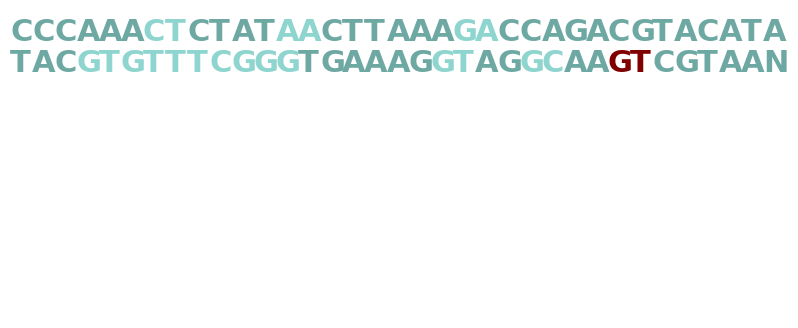

Top 2 activated prototype patch for this seq:	 AGGCAAGTCG
Most activated image patch:			 AGGCAAGTCG
Max activation: 0.9450070858001709


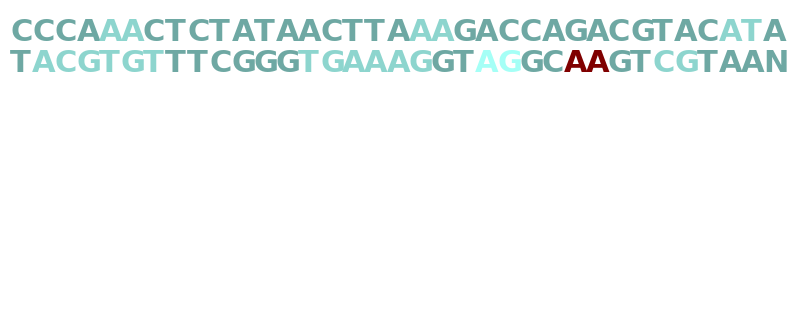

Top 3 activated prototype patch for this seq:	 AGGCAAGTCG
Most activated image patch:			 AGGCAAGTCG
Max activation: 0.9450070858001709


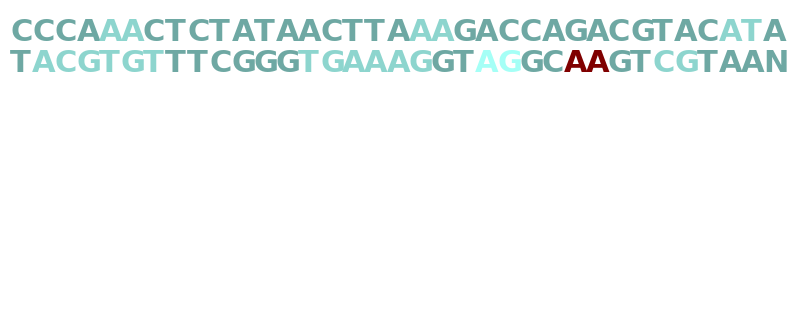

Top 4 activated prototype patch for this seq:	 AGGCAAGTCG
Most activated image patch:			 AGGCAAGTCG
Max activation: 0.9450070858001709


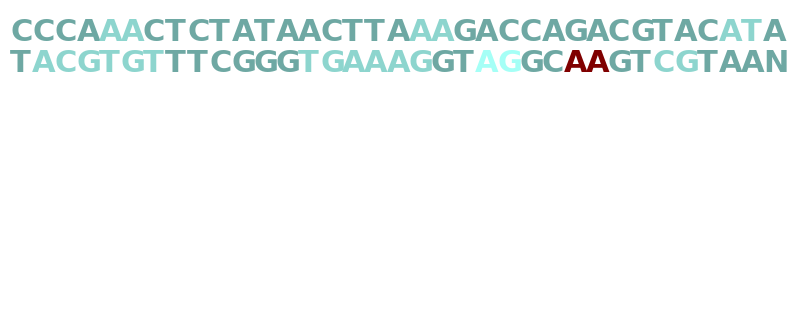

Top 5 activated prototype patch for this seq:	 AGGCAAGTCG
Most activated image patch:			 AGGCAAGTCG
Max activation: 0.8840305209159851


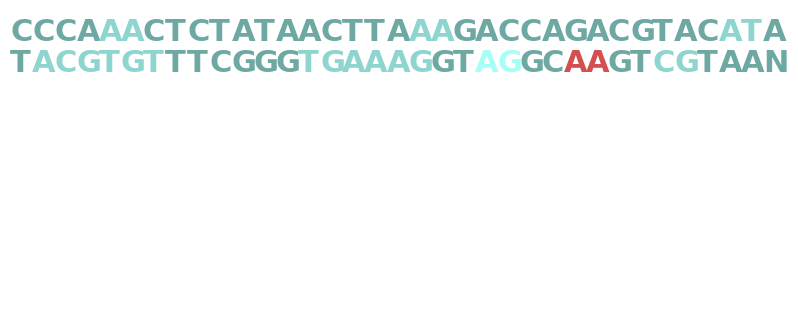

Top 6 activated prototype patch for this seq:	 GGAGGCAAGT
Most activated image patch:			 GTAGGCAAGT
Max activation: 0.8629686832427979


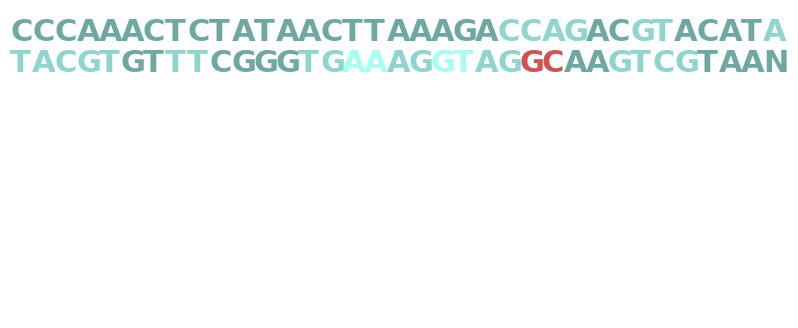

Top 7 activated prototype patch for this seq:	 GGAGGCAAGT
Most activated image patch:			 GTAGGCAAGT
Max activation: 0.7958965301513672


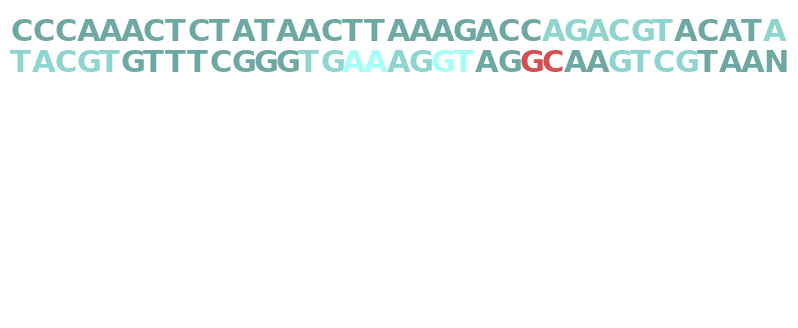

Top 8 activated prototype patch for this seq:	 GGAGGCAAGT
Most activated image patch:			 GTAGGCAAGT
Max activation: 0.7958964109420776


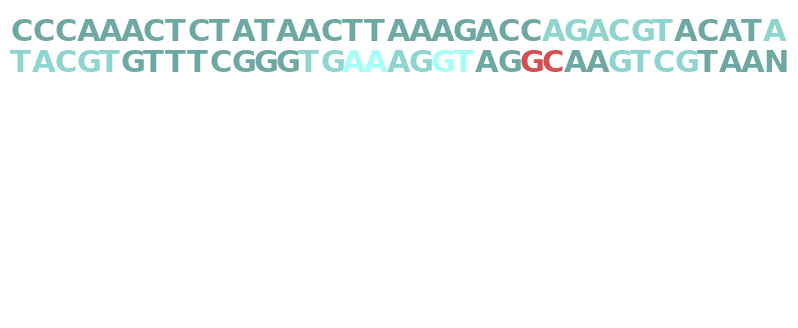

Top 9 activated prototype patch for this seq:	 GGAGGCAAGT
Most activated image patch:			 GTAGGCAAGT
Max activation: 0.7958964109420776


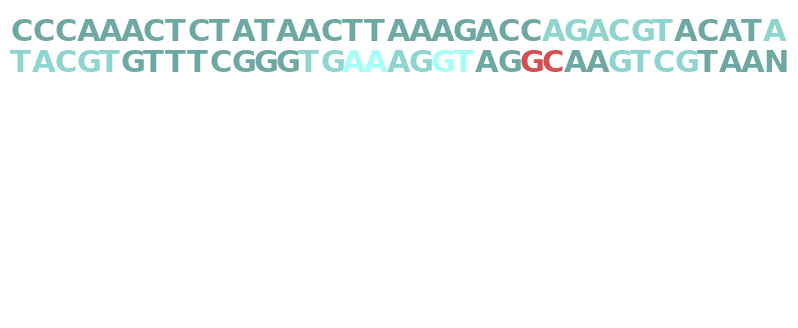

Top 10 activated prototype patch for this seq:	 CTAACTTAAA
Most activated image patch:			 ATAACTTAAA
Max activation: 0.7638119459152222


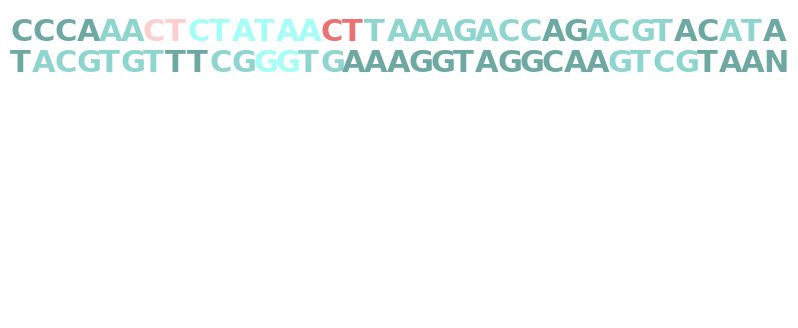

In [2128]:
# Local analysis, given a sequence, looking at any prototype (type = most_activated_prototypes)
# Run this for the train and test set
for prototype_num in range(1, 11):
    visualize_local_analysis(
        model_path="./local_results/train_local_seq_50/small_best_updated/1892566_8_-1_latent_0.7/1892566_8_-1.pth/",
        type='most_activated_prototypes',
        ptype_rank=prototype_num
    )

Top 1 activated prototype patch for this seq:	 AGAGGGGGGA
Most activated image patch:			 TCTCAAGAGG
Max activation: 0.6680658459663391


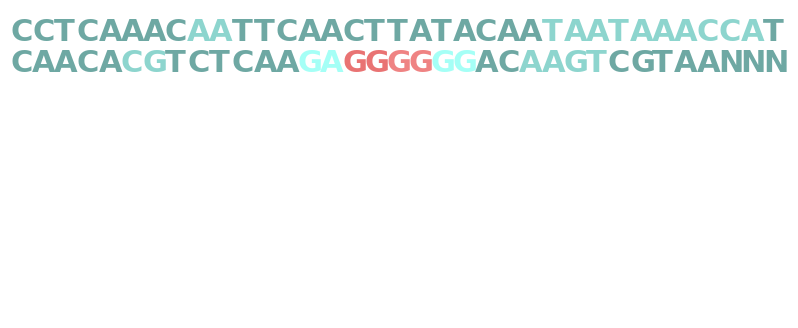

Top 2 activated prototype patch for this seq:	 AGAGGGGGGA
Most activated image patch:			 TCTCAAGAGG
Max activation: 0.6680658459663391


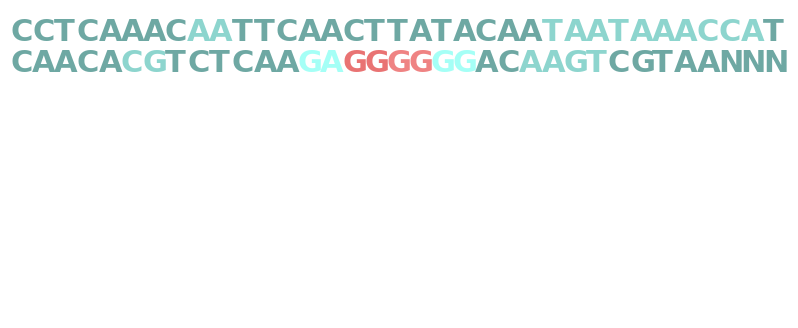

Top 3 activated prototype patch for this seq:	 CCAAACAATC
Most activated image patch:			 NNCCTCAAAC
Max activation: 0.6566147804260254


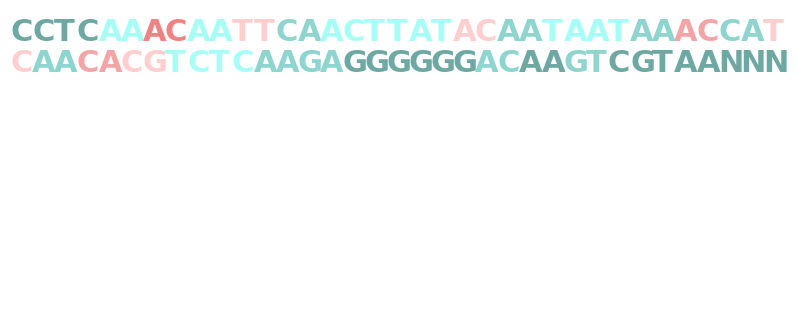

In [2129]:
# Reasoning process, given a sequence, looking at only the 3 prototypes from the top-1 class (predicted) (type = top-1_class_prototypes)
# Run this for the train and test set
for prototype_num in range(1,4):
    visualize_local_analysis(
        model_path="./local_results/test_local_seq_25/small_best_updated/1892566_8_-1_latent_0.7/1892566_8_-1.pth/",
        type='top-1_class_prototypes', # only look at prototypes for the predicted class
        ptype_rank=prototype_num
    )

In [2130]:
def visualize_global_analysis(model_path="./global_results/small_best_updated/1892566_3_-1_latent_0.7/1892566_3_-1.pth/",
                                type='most_activated_test_patches_for_prot_',
                                prot_rank=1, prot_ind=25):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}
    matplotlib.rc('font', **font)

    files=os.listdir('{}{}{}'.format(model_path,type,prot_ind))
    for f in files:
        if f.split('_')[0]=='top-'+str(prot_rank):
            if f.split('_')[3]=='map':
                act_map_fname=f
            elif f.split('_')[3]=='seq':
                test_seq_fname=f
            
    act_map = np.load(os.path.join(model_path, f'{type}{prot_ind}', act_map_fname))[0]
    # print(f"Length of act map before: {len(act_map)}") # 31
    act_map = np.repeat(act_map, repeats=2)
    # print(f"Length of act map after doubling: {len(act_map)}") # 62
    act_map = np.pad(act_map, (4, 4), 'constant', constant_values=(0, 0))
    # print(f"Length of act map after padding: {len(act_map)}") # 70
    print(f"Max activation: {np.max(act_map)}")

    # Add two activations of value 0 to each side of the activation map to make
    # it so that there are 70 chars printed.
    # print(f"act_map.shape: {act_map.shape}")
    #for i in range(act_map.shape[-1] // 2 - 1):
    #    act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

    proto_patch = np.load(f'{model_path}/prototype_patch.npy')
    input_test_seq = np.load('{}{}{}/{}'.format(model_path, type, str(prot_ind), test_seq_fname))
    test_seq_patch = np.load('{}{}{}/top-{}_activated_test_patch.npy'.format(model_path, type, str(prot_ind), str(prot_rank)))
    # test_seq_patch = np.load(os.path.join'{}{}{}/top-{}_activated_test_patch.npy'.format(model_path, type, str(prot_ind), str(img_ind)))
    # print(f"test_seq_patch: {test_seq_patch}")
    print(f"Prototype:\t\t\t\t\t\t", array_to_str(proto_patch))
    print(f"Top {prot_rank} activated patch in test seq for this prototype:\t", array_to_str(test_seq_patch))
    # print(f"Top {prot_rank} activated prototype patch for this seq:\t", array_to_str(proto_patch))
    # print(f"Most activated image patch:\t\t\t", array_to_str(test_patch))
    # print(f"input_test_seq: {input_test_seq}")
    input_test_seq = array_to_str(input_test_seq[0])
    print(f"input_test_seq: {input_test_seq}")
    # print(f"act_map: {act_map}")

    # For 14 chars/line:
    # plt.figure(figsize=(4, 4))  # Width: 10 inches, Height: 6 inches
    # For 35 chars/line:
    plt.figure(figsize=(10, 4))  # Width: 10 inches, Height: 6 inches
    colors = lbluetodred(act_map)
    # colors = plt.get_cmap('coolwarm')(act_map) 
    # colors = plt.get_cmap('cividis')(act_map) 
    chars_per_line = 35#14
    char_height = 1/10
    for ind, c in enumerate(colors):
        x = (ind % chars_per_line) / chars_per_line
        # y = 1 - ((ind // chars_per_line) / 10)
        y = 1 - (char_height * (ind // chars_per_line + 1))
        plt.text(x, y, input_test_seq[ind], color=c)
    plt.axis('off')
    plt.show()

Max activation: 0.7965323328971863
Prototype:						 AAGATAAGGG
Top 1 activated patch in test seq for this prototype:	 TAAAAAAGGG
input_test_seq: CCCCGATAAAACGTCCATAATTAGTAAATAACGAGATAACTCTAAAAAAGGGNNNNNNNNNNNNNNNNNN


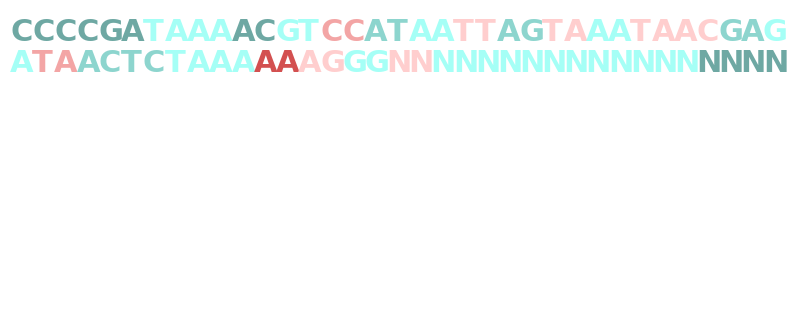

Max activation: 0.7664391994476318
Prototype:						 AAGATAAGGG
Top 2 activated patch in test seq for this prototype:	 TAACGTGTCG
input_test_seq: CCCCAACTTTAACTTAAACATGTAATTAACCAGATAATTAATACCACGGGGAGATAACGTGTCGTAANNN


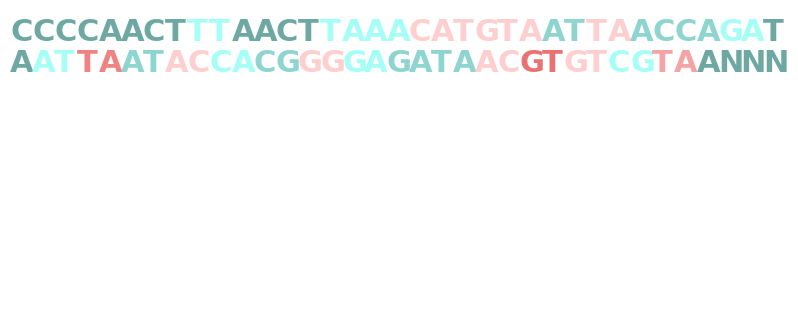

Max activation: 0.7515944838523865
Prototype:						 AAGATAAGGG
Top 3 activated patch in test seq for this prototype:	 AGAGAAGGGG
input_test_seq: TCCTAAAATAGACCGAACAATTAAATAATTACTTCAACCTATGTAGAGAAGGGGGGGAAGTCACGTGTAN


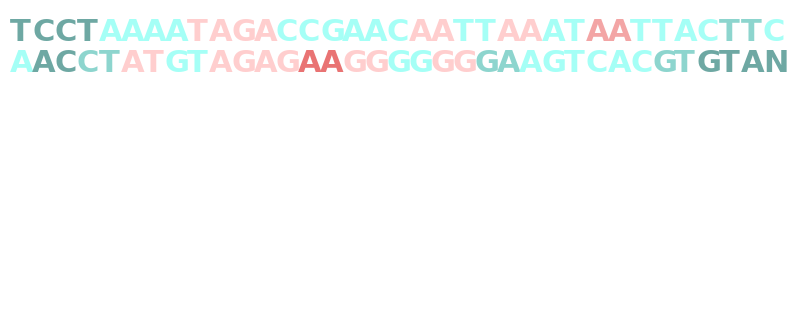

Max activation: 0.7364374995231628
Prototype:						 AAGATAAGGG
Top 4 activated patch in test seq for this prototype:	 ACGTAAAAGG
input_test_seq: CCCCAAACCACCAAATCCCGAATCAATAATAATTTTGCTAGGACGTAAAAGGGAGGCAAGTCGTAANNNN


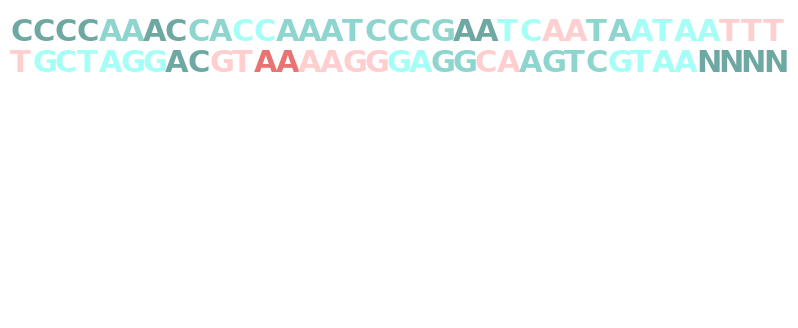

Max activation: 0.7300775051116943
Prototype:						 AAGATAAGGG
Top 5 activated patch in test seq for this prototype:	 GAAGGTAAAG
input_test_seq: CTCCGACCACCACCCATACTGTTTGAAGGTAAAGGAGAACGTGAAAGTCGTANNNNNNNNNNNNNNNNNN


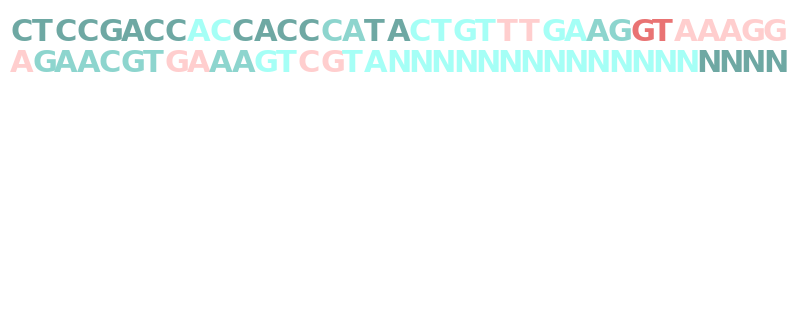

Max activation: 0.6995428204536438
Prototype:						 AAGATAAGGG
Top 6 activated patch in test seq for this prototype:	 AGACCACGGG
input_test_seq: CCCACGCCTCCTACCACCACTAATTAATTATACCTAATTATTTTCATAAGACCACGGGGAGGCAAGTCGT


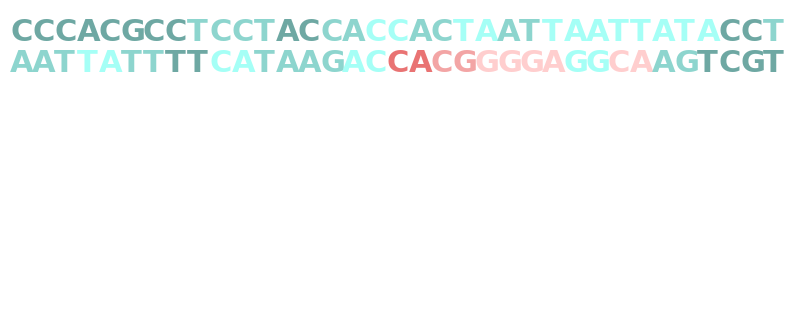

Max activation: 0.6967455744743347
Prototype:						 AAGATAAGGG
Top 7 activated patch in test seq for this prototype:	 TTTGGTATAA
input_test_seq: CCCTGGCCCGCACGTTACTTTAAGTATTTCCTTTTGGTATAAGGGAGGCAAGTCGTAANNNNNNNNNNNN


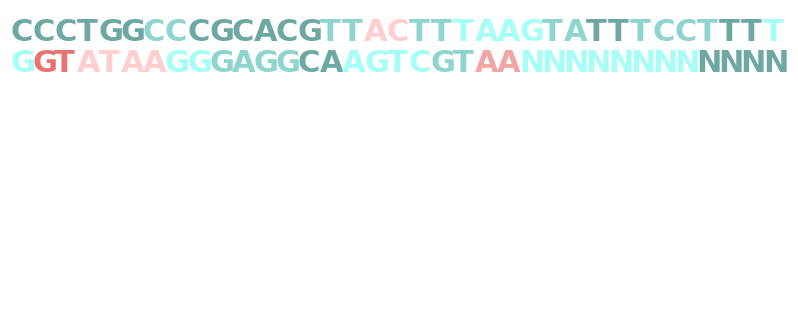

Max activation: 0.6867543458938599
Prototype:						 AAGATAAGGG
Top 8 activated patch in test seq for this prototype:	 AAACAAGGGG
input_test_seq: CCACGACATCAAACAAACAAGTAAATAACAACGTAATATCTTTAAAACAAGGGGAGGCAAGTCGTANNNN


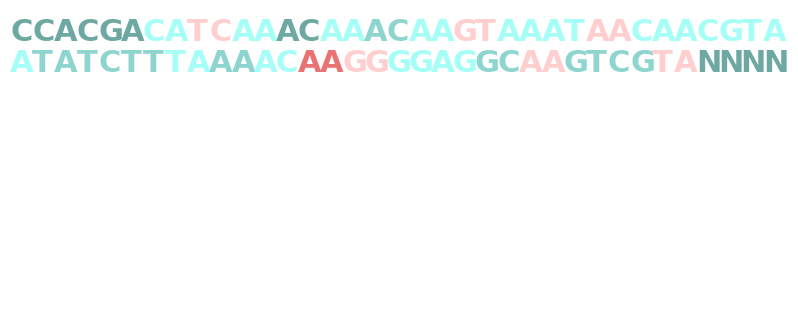

Max activation: 0.6865514516830444
Prototype:						 AAGATAAGGG
Top 9 activated patch in test seq for this prototype:	 AAAAAAAGAA
input_test_seq: CCCGCAAAAAACTTTAAAGACGTTACTTAACGCCACAAAAAAAGAAGGGGAGGCAAGTCGTAANNNNNNN


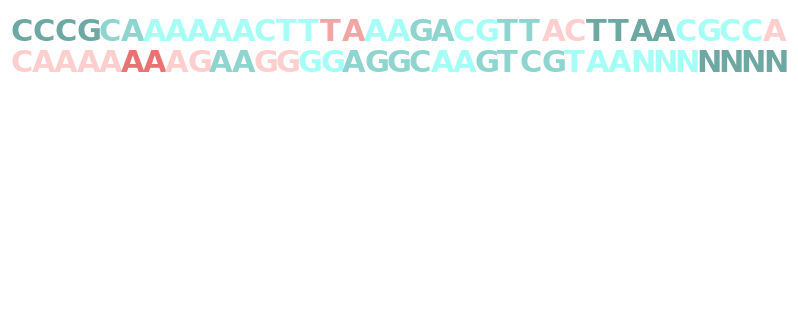

Max activation: 0.6706429123878479
Prototype:						 AAGATAAGGG
Top 10 activated patch in test seq for this prototype:	 CAGTAAAGGG
input_test_seq: CCCAAACTAACTCAACCCTTCTCTGTAAATAAAATAATACCACAGTAAAGGGGAGGCAGGTCGTAANNNN


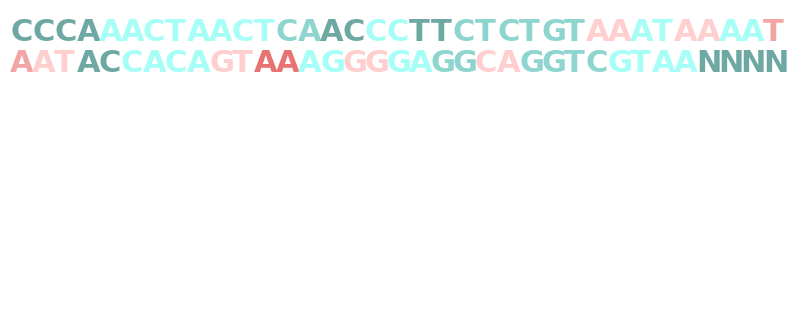

In [2131]:
# Top image patches for a given prototype
# TODO: BUG: I think global_analysis.py used the same prototype for the 25 and 50 folders. Or, it could be user error in the command when I called global_analysis.py.
for i in range(1, 11):
    # visualize_global_analysis(model_path='./global_results/small_best_updated/1892566_1_-1_latent_0/1892566_1_-1.pth/', type='most_activated_test_patches_for_prot_', prot_ind=50, prot_rank=i) # CHANGE TRAIN OR TEST HERE
    visualize_global_analysis(model_path='./global_results/small_best_updated/1892566_4_-1_latent_0.3/1892566_4_-1.pth/', type='most_activated_test_patches_for_prot_', prot_ind=50, prot_rank=i) # CHANGE TRAIN OR TEST HERE
    # visualize_global_analysis(model_path='./global_results/small_best_updated/1892566_8_-1_latent_0.7/1892566_8_-1.pth/', type='most_activated_test_patches_for_prot_', prot_ind=25, prot_rank=i) # CHANGE TRAIN OR TEST HERE
    # visualize_global_analysis(model_path='./global_results/small_best_updated/1892566_11_-1_latent_1/1892566_11_-1.pth/', type='most_activated_test_patches_for_prot_', prot_ind=25, prot_rank=i) # CHANGE TRAIN OR TEST HERE
# 5 -> 35 = 31 activations
# 31 * 2 = 62 activations + 4*2 padding = 70 TTCCTATTAA

In [2132]:
def visualize_prototype_self_act(model_path='./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/',
                                prototype_ind=1):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}
    matplotlib.rc('font', **font)

    act_map = np.load('{}prototype_{}_activations.npy'.format(model_path, prototype_ind))
    act_map = np.repeat(act_map, repeats=2)
    #for i in range(act_map.shape[-1] // 2 - 1):
    #    act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

    input_seq = np.load('{}prototype_{}_original.npy'.format(model_path, prototype_ind))
    proto_patch = np.load('{}prototype_{}_patch.npy'.format(model_path, prototype_ind))
    print("Prototype: ", array_to_str(proto_patch))
    input_seq = array_to_str(input_seq)

    colors = plt.get_cmap('coolwarm')(act_map)
    chars_per_line = 20
    for ind, c in enumerate(colors):
        x = (ind % chars_per_line) / chars_per_line
        y = 1 - ((ind // chars_per_line) / 10)
        plt.text(x, y, input_seq[ind], color=c)
    plt.axis('off')
    plt.show()

In [2133]:
# # Each tuple is model_dir, specific_model, epoch for model
# latent_weight_to_model = {
#     1: ('base_feature/ablation_latent_1/', '250_19push0.7820.pth', '250'),
#     0.9: ('base_feature/ablation_latent_0.9/', '200_4push0.7632.pth', '200'),
#     0.8: ('base_feature/ablation_latent_0.8/', '300_5push0.8083.pth', '300'),
#     0.7: ('base_feature/ablation_latent_0.7/', '250_16push0.7970.pth', '250'),
#     0.6: ('base_feature/ablation_latent_0.6/', '300_15push0.7782.pth', '300'),
#     0.5: ('base_feature/ablation_latent_0.5/', '450_12push0.8008.pth', '450'),
#     0.4: ('base_feature/ablation_latent_0.4/', '300_12push0.7669.pth', '300'),
#     0.3: ('base_feature/ablation_latent_0.3/', '350_17push0.7519.pth', '350'),
#     0.2: ('base_feature/ablation_latent_0.2/', '250_19push0.7218.pth', '250'),
#     0.1: ('base_feature/ablation_latent_0.1/', '250_7push0.7068.pth', '250'),
#     0: ('base_feature/ablation_latent_0/', '350_19push0.5977.pth', '350')
# }
# latent_weight_to_model = {
#     1: ('some job id name', '250_19push0.7820.pth', '250'),
#     0.9: ('base_feature/ablation_latent_0.9/', '200_4push0.7632.pth', '200'),
#     0.8: ('base_feature/ablation_latent_0.8/', '300_5push0.8083.pth', '300'),
#     0.7: ('base_feature/ablation_latent_0.7/', '250_16push0.7970.pth', '250'),
#     0.6: ('base_feature/ablation_latent_0.6/', '300_15push0.7782.pth', '300'),
#     0.5: ('base_feature/ablation_latent_0.5/', '450_12push0.8008.pth', '450'),
#     0.4: ('base_feature/ablation_latent_0.4/', '300_12push0.7669.pth', '300'),
#     0.3: ('base_feature/ablation_latent_0.3/', '350_17push0.7519.pth', '350'),
#     0.2: ('base_feature/ablation_latent_0.2/', '250_19push0.7218.pth', '250'),
#     0.1: ('base_feature/ablation_latent_0.1/', '250_7push0.7068.pth', '250'),
#     0: ('base_feature/ablation_latent_0/', '350_19push0.5977.pth', '350')
# }

# target_latent_weight = 0.5
# target_seq = 25
# model_dir = latent_weight_to_model[target_latent_weight][0]
# target_model = latent_weight_to_model[target_latent_weight][1]
# epoch_num = latent_weight_to_model[target_latent_weight][2]

# #visualize_prototype_self_act(model_path='./saved_models/{}/seq/epoch-{}/'.format(model_dir, epoch_num),
# #                            prototype_ind=1)
# # def visualize_local_analysis(model_path="./local_results/test_local_seq_25/small_best_updated/'1878231_3_-1.pth'/'1878231_3_-1.pth'/",
# #                                 type='most_activated_prototypes',
# #                                 img_ind=1):

# for i in range(3):
#     visualize_local_analysis(model_path=os.join('local_results', f'test_local_seq_{target_seq}', 'small_best_updated', model_dir, target_model), img_ind=i+1)

In [2134]:
# visualize_local_analysis(model_path="./local_results/small_best_updated/'1878231_3_-1.pth'/'1878231_3_-1.pth'/",
#         img_ind=2)
# # model_path="./global_results/small_best_updated/'1878231_3_-1.pth'/'1878231_3_-1.pth'/",
# #                                 type='most_activated_test_patches_for_prot_',
# #                                 img_ind=1, prot_ind=1

In [2135]:
# visualize_local_analysis(model_path='./test_local_seq_15/base_feature/corrected_max_test_0.6/350_10push0.7820.pth/',
#         img_ind=1)

In [2136]:
# visualize_local_analysis(model_path='./test_local_seq_50/base_feature/corrected_max_test_0.8/350_10push0.7895.pth/',
#         type='top-4_class_prototypes',
#         img_ind=9)